<a href="https://colab.research.google.com/github/anchalnagwanshi/DL-assignments/blob/main/RNN_Assignment_10_MRM2024009.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import TextVectorization, Embedding, Bidirectional, SimpleRNN, GRU, LSTM, Dense
from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [ ]:
dataset = tfds.load('imdb_reviews', with_info=False, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [ ]:
BUFFER_SIZE = 15000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [ ]:
VOCAB_SIZE = 5000
encoder = TextVectorization(max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

## RNN

In [ ]:
model = Sequential([
    encoder,
    Embedding(input_dim=len(encoder.get_vocabulary()),output_dim=64,mask_zero=True),
    SimpleRNN(64, return_sequences=True),
    SimpleRNN(64),
    Dense(64, activation='relu'),
    Dense(1)
])

In [ ]:
model.compile(loss=BinaryCrossentropy(from_logits=True),
              optimizer=Adam(1e-4), metrics=['accuracy'])

In [ ]:
history1 = model.fit(train_dataset, epochs=5, validation_data=test_dataset)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 1310s 3s/step - accuracy: 0.5537 - loss: 0.6615 - val_accuracy: 0.7616 - val_loss: 0.4854
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 1274s 3s/step - accuracy: 0.8303 - loss: 0.3973 - val_accuracy: 0.8606 - val_loss: 0.3308
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 1306s 3s/step - accuracy: 0.8828 - loss: 0.2839 - val_accuracy: 0.8543 - val_loss: 0.3289
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 1265s 3s/step - accuracy: 0.9072 - loss: 0.2321 - val_accuracy: 0.8682 - val_loss: 0.3064
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 1262s 3s/step - accuracy: 0.9252 - loss: 0.1911 - val_accuracy: 0.8709 - val_loss: 0.3300


Text(0, 0.5, 'Accuracy')

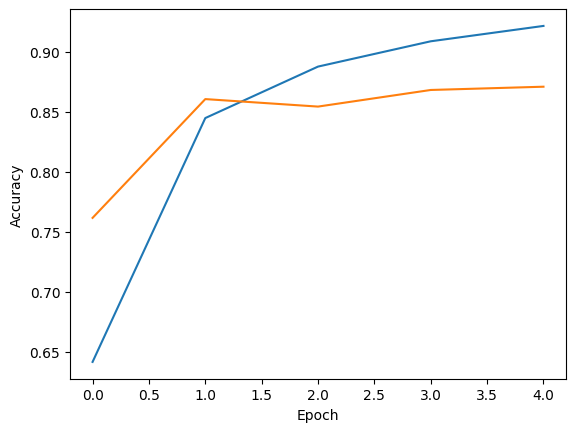

In [ ]:
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

The RNN model effectively captures the sequential nature of movie reviews, enabling it to learn context and sentiment over time. It performs reasonably well on the IMDB sentiment analysis task, especially when handling shorter reviews or those with clear sentiment cues.

**Strengths:**
- Good at processing sequential data.
- Maintains contextual information through hidden states.
- Handles variable-length inputs naturally.

**Weaknesses:**
- Struggles with long-term dependencies due to vanishing gradients.
- Slower training compared to feedforward models.
- Less effective than LSTM/GRU for complex or lengthy reviews.

**Conclusion:**  
RNNs provide a solid baseline for sentiment analysis but are typically outperformed by more advanced architectures like LSTMs, GRUs which we will see now.

## GRU

In [ ]:
model = Sequential([
    encoder,
    Embedding(input_dim=len(encoder.get_vocabulary()),output_dim=64,mask_zero=True),
    GRU(64, return_sequences=True),
    GRU(64),
    Dense(64, activation='relu'),
    Dense(1)
])

In [ ]:
model.compile(loss=BinaryCrossentropy(from_logits=True),
              optimizer=Adam(1e-4), metrics=['accuracy'])

In [ ]:
history2 = model.fit(train_dataset, epochs=5, validation_data=test_dataset)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 82ms/step - accuracy: 0.5131 - loss: 0.6779 - val_accuracy: 0.8323 - val_loss: 0.3858
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.8473 - loss: 0.3541 - val_accuracy: 0.8704 - val_loss: 0.3184
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.8910 - loss: 0.2706 - val_accuracy: 0.8733 - val_loss: 0.3003
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 77ms/step - accuracy: 0.9091 - loss: 0.2334 - val_accuracy: 0.8656 - val_loss: 0.3390
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 79ms/step - accuracy: 0.9168 - loss: 0.2133 - val_accuracy: 0.8745 - val_loss: 0.3047


Text(0, 0.5, 'Accuracy')

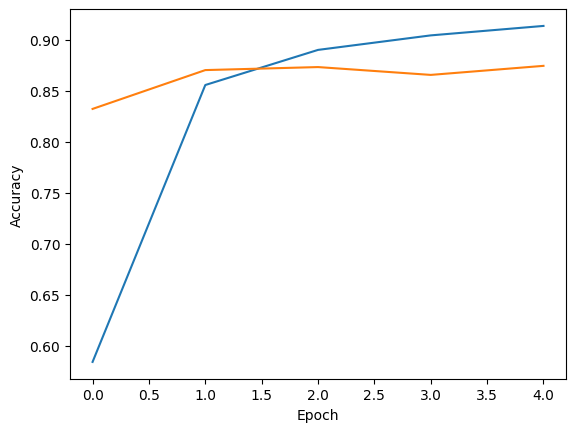

In [ ]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

## LSTM

In [ ]:
model = Sequential([
    encoder,
    Embedding(input_dim=len(encoder.get_vocabulary()),output_dim=64,mask_zero=True),
    LSTM(64, return_sequences=True),
    LSTM(64),
    Dense(64, activation='relu'),
    Dense(1)
])

In [ ]:
model.compile(loss=BinaryCrossentropy(from_logits=True),
              optimizer=Adam(1e-4), metrics=['accuracy'])

In [ ]:
history3 = model.fit(train_dataset, epochs=5, validation_data=test_dataset)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 80ms/step - accuracy: 0.5575 - loss: 0.6461 - val_accuracy: 0.8416 - val_loss: 0.3594
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 81ms/step - accuracy: 0.8618 - loss: 0.3311 - val_accuracy: 0.8641 - val_loss: 0.3273
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 78ms/step - accuracy: 0.8950 - loss: 0.2603 - val_accuracy: 0.8746 - val_loss: 0.3003
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 80ms/step - accuracy: 0.9135 - loss: 0.2193 - val_accuracy: 0.8729 - val_loss: 0.2987
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.9124 - loss: 0.2205 - val_accuracy: 0.8704 - val_loss: 0.3053


Text(0, 0.5, 'Accuracy')

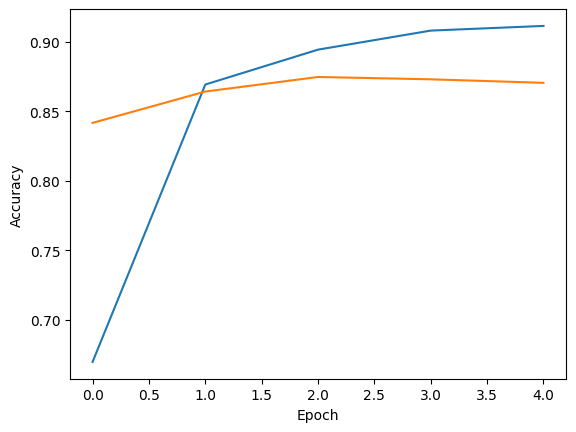

In [ ]:
plt.plot(history3.history['accuracy'], label='accuracy')
plt.plot(history3.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

**Findings:**

LSTM and GRU outperformed the vanilla RNN on the IMDB sentiment analysis task. Both handled long reviews and context better, with GRU training slightly faster and using fewer parameters than LSTM, while maintaining similar accuracy.

**Suggestions:**

- **RNN:** Preferable for simple or short sequences with limited context.
- **GRU:** Ideal when training time and efficiency matter, with good performance on moderately complex tasks.
- **LSTM:** Best for tasks with long-term dependencies or more complex context.

**Conclusion:**  
For sentiment analysis of long reviews, LSTM and GRU are superior to RNNs, with GRU offering a good balance of speed and accuracy.